In [0]:
from azure.storage.blob import BlobServiceClient
from io import StringIO
import pandas as pd

# Azure account details
account_name = "finalproj02"
container_name = "final"
blob_name = "crop_yield.csv"
account_key = "7EIjMn1rW1OUWX6ovQEUd99M30UOyJTo+M5OOSnqV3Y8rZB7G/UXPLn3ngi75aAG5CWNZRnabkON+ASt6DU3FA=="

# Use the account key for authentication
blob_service_client = BlobServiceClient(
    account_url=f"https://{account_name}.blob.core.windows.net",
    credential=account_key
)

# Access the blob client
container_client = blob_service_client.get_container_client(container_name)
blob_client = container_client.get_blob_client(blob_name)

# Download the blob content
blob_data = blob_client.download_blob().readall()
blob_text = blob_data.decode('utf-8')

# Load the content into a DataFrame
df = pd.read_csv(StringIO(blob_text))
print(df.head())





           Crop  Crop_Year       Season  ...  Fertilizer  Pesticide        Yield
0      Arecanut       1997  Whole Year   ...  7024878.38   22882.34     0.796087
1     Arhar/Tur       1997  Kharif       ...   631643.29    2057.47     0.710435
2   Castor seed       1997  Kharif       ...    75755.32     246.76     0.238333
3      Coconut        1997  Whole Year   ...  1870661.52    6093.36  5238.051739
4  Cotton(lint)       1997  Kharif       ...   165500.63     539.09     0.420909

[5 rows x 10 columns]


In [0]:
# Check the schema of the DataFrame
print(df.dtypes)


Crop                object
Crop_Year            int64
Season              object
State               object
Area               float64
Production           int64
Annual_Rainfall    float64
Fertilizer         float64
Pesticide          float64
Yield              float64
dtype: object


In [0]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64


In [0]:
# Summary statistics for numerical columns
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
          Crop_Year          Area  ...     Pesticide         Yield
count  19689.000000  1.968900e+04  ...  1.968900e+04  19689.000000
mean    2009.127584  1.799266e+05  ...  4.884835e+04     79.954009
std        6.498099  7.328287e+05  ...  2.132874e+05    878.306193
min     1997.000000  5.000000e-01  ...  9.000000e-02      0.000000
25%     2004.000000  1.390000e+03  ...  3.567000e+02      0.600000
50%     2010.000000  9.317000e+03  ...  2.421900e+03      1.030000
75%     2015.000000  7.511200e+04  ...  2.004170e+04      2.388889
max     2020.000000  5.080810e+07  ...  1.575051e+07  21105.000000

[8 rows x 7 columns]


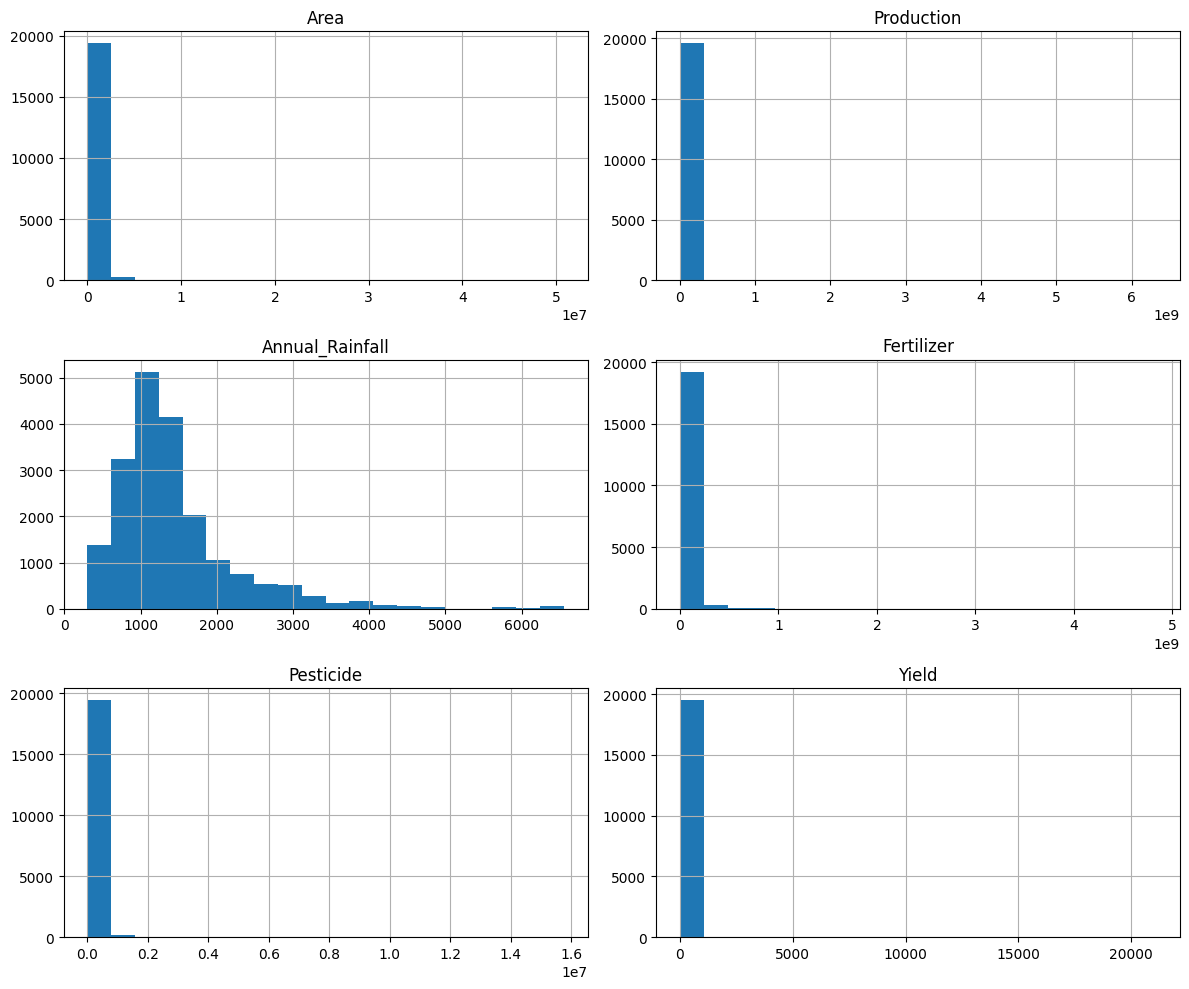

In [0]:
# Visualize the distribution of numerical columns (Histograms)
import matplotlib.pyplot as plt
df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']].hist(bins=20, figsize=(12, 10))
plt.tight_layout()
plt.show()

In [0]:
# Group by State and summarize key metrics
state_summary = df.groupby('State').agg(
    avg_area=('Area', 'mean'),
    avg_production=('Production', 'mean'),
    avg_rainfall=('Annual_Rainfall', 'mean'),
    avg_fertilizer=('Fertilizer', 'mean'),
    avg_pesticide=('Pesticide', 'mean'),
    avg_yield=('Yield', 'mean')
).reset_index()
print("\nState-wise summary:")
print(state_summary)



State-wise summary:
                State       avg_area  ...  avg_pesticide   avg_yield
0      Andhra Pradesh  188724.593207  ...   49057.853752  181.465391
1   Arunachal Pradesh   19607.982877  ...    5328.217123    3.735060
2               Assam  105803.830369  ...   28639.494241  219.716345
3               Bihar  187494.900670  ...   50570.092712    3.476499
4        Chhattisgarh  120804.583607  ...   32165.368077    1.966733
5               Delhi    3930.556650  ...    1038.665222   13.118670
6                 Goa   11177.237805  ...    3051.265711  354.780305
7             Gujarat  272257.445777  ...   73521.556776    6.697227
8             Haryana  208410.449445  ...   56593.115328    5.532732
9    Himachal Pradesh   28912.675000  ...    7689.492620    1.899496
10  Jammu and Kashmir   29703.941363  ...    8147.768003    1.308051
11          Jharkhand  112724.173148  ...   32309.480141    3.609723
12          Karnataka  180102.932263  ...   48305.248547  105.720578
13           

In [0]:
# Group by Season and summarize key metrics
season_summary = df.groupby('Season').agg(
    avg_area=('Area', 'mean'),
    avg_production=('Production', 'mean'),
    avg_rainfall=('Annual_Rainfall', 'mean'),
    avg_fertilizer=('Fertilizer', 'mean'),
    avg_pesticide=('Pesticide', 'mean'),
    avg_yield=('Yield', 'mean')
).reset_index()
print("\nSeason-wise summary:")
print(season_summary)


Season-wise summary:
        Season       avg_area  ...  avg_pesticide   avg_yield
0  Autumn       141609.590556  ...   37507.939884    3.917482
1  Kharif       206844.275420  ...   56181.998769    2.482002
2  Rabi         204212.491991  ...   56049.566362    1.988518
3  Summer        82670.391565  ...   22862.856128    2.997370
4  Whole Year    61646.999056  ...   15791.310846  412.995463
5  Winter       721554.382082  ...  195122.630896    5.287267

[6 rows x 7 columns]


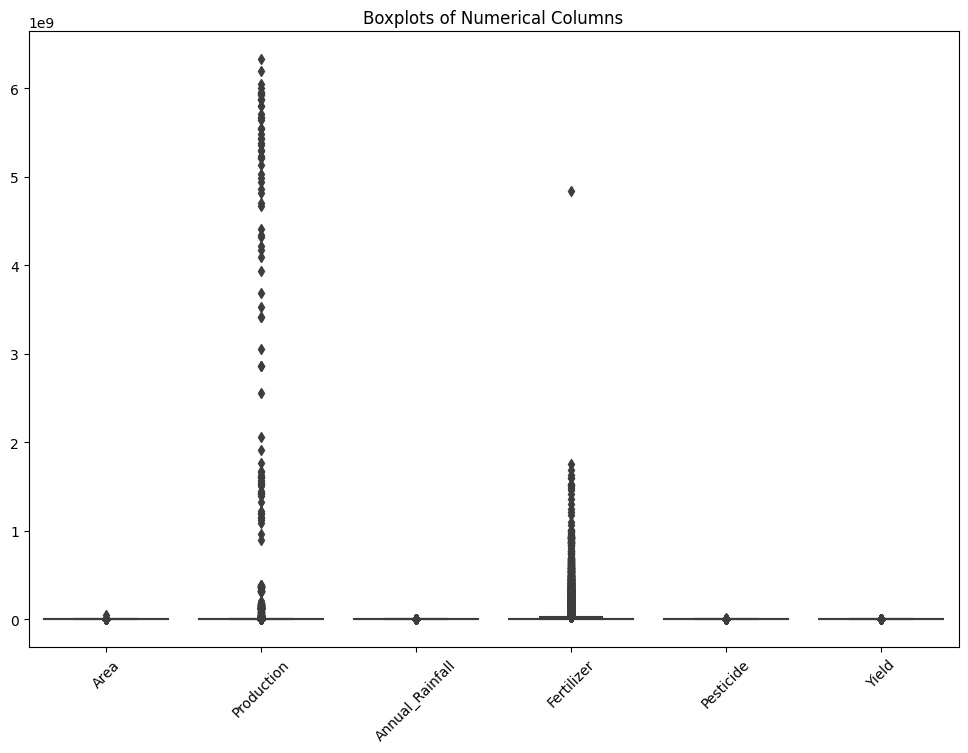

In [0]:
# Boxplots for numerical columns to check for outliers
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']])
plt.title('Boxplots of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [0]:
# Count the total number of rows
total_count = spark.sql("SELECT COUNT(*) AS total_rows FROM crop_yield_csv")
total_count.show()


+----------+
|total_rows|
+----------+
|     19690|
+----------+



In [0]:
# Get summary statistics for numeric columns
spark.sql("DESCRIBE crop_yield_csv").show()




+---------------+---------+-------+
|       col_name|data_type|comment|
+---------------+---------+-------+
|           Crop|   string|   NULL|
|      Crop_Year|   string|   NULL|
|         Season|   string|   NULL|
|          State|   string|   NULL|
|           Area|   string|   NULL|
|     Production|   string|   NULL|
|Annual_Rainfall|   string|   NULL|
|     Fertilizer|   string|   NULL|
|      Pesticide|   string|   NULL|
|            _c9|   string|   NULL|
+---------------+---------+-------+



In [0]:
# Use the `describe` function for detailed summary statistics
spark.sql("SELECT * FROM crop_yield_csv").describe().show()

+-------+--------------+------------------+-----------+--------------+------------------+--------------------+------------------+-------------------+------------------+-----------------+
|summary|          Crop|         Crop_Year|     Season|         State|              Area|          Production|   Annual_Rainfall|         Fertilizer|         Pesticide|              _c9|
+-------+--------------+------------------+-----------+--------------+------------------+--------------------+------------------+-------------------+------------------+-----------------+
|  count|         19690|             19690|      19690|         19690|             19690|               19690|             19690|              19690|             19690|            19690|
|   mean|          NULL|2009.1275839301134|       NULL|          NULL|179926.57030814158|1.6435941273096653E7|1437.7551766159786|2.410331244880596E7|  48848.3533920092|79.95400913008655|
| stddev|          NULL| 6.498098951393266|       NULL|          

In [0]:
# Get distinct values in the 'Gender' column
spark.sql("SELECT DISTINCT Season FROM crop_yield_csv").show()


+-----------+
|     Season|
+-----------+
|Whole Year |
|Autumn     |
|Winter     |
|     Season|
|Summer     |
|Rabi       |
|Kharif     |
+-----------+

